# `classification.XGBoostClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0


In [18]:
from slickml.classification import XGBoostClassifier

help(XGBoostClassifier)

Help on class XGBoostClassifier in module slickml.classification._xgboost:

class XGBoostClassifier(slickml.base._estimator.BaseXGBoostEstimator, sklearn.base.ClassifierMixin)
 |  XGBoostClassifier(num_boost_round: Optional[int] = 200, sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict[str, Union[str, float, int]]] = None) -> None
 |  
 |  XGBoost Classifier.
 |  
 |  This is a wrapper using XGBoost classifier to train a XGBoost [xgboost-api]_ model using the number of
 |  boosting rounds from the inputs. This is also the base class for ``XGBoostCVClassifier``.
 |  
 |  Parameters
 |  ----------
 |  num_boost_round : int, optional
 |      Number of boosting rounds to fit a model, by default 200
 |  
 |  sparse_matrix : bool, optional
 |      Whether to convert the input features to sparse matrix with csr format or not. This would
 |      increase the speed of 

### Example 1: `XGBoostClassifer` mode for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
# custom params
params = {
    "eval_metric": "logloss",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
clf = XGBoostClassifier(
    num_boost_round=333,
    params=params,
)
clf.fit(X_train, y_train)

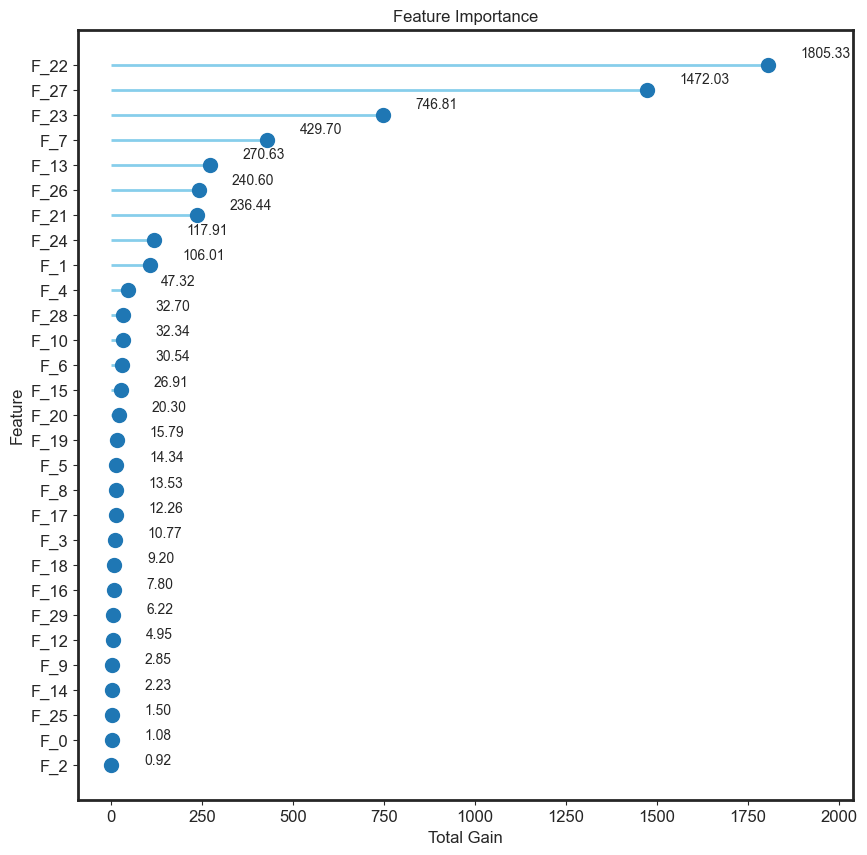

In [6]:
clf.plot_feature_importance(figsize=(10, 10))

In [7]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([8.5527293e-04, 9.9859780e-01, 5.2412052e-04, 9.9980670e-01,
       4.1708272e-04, 9.9063778e-01, 9.9084270e-01, 1.0586309e-02,
       1.3312799e-01, 9.9936873e-01], dtype=float32)

In [8]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

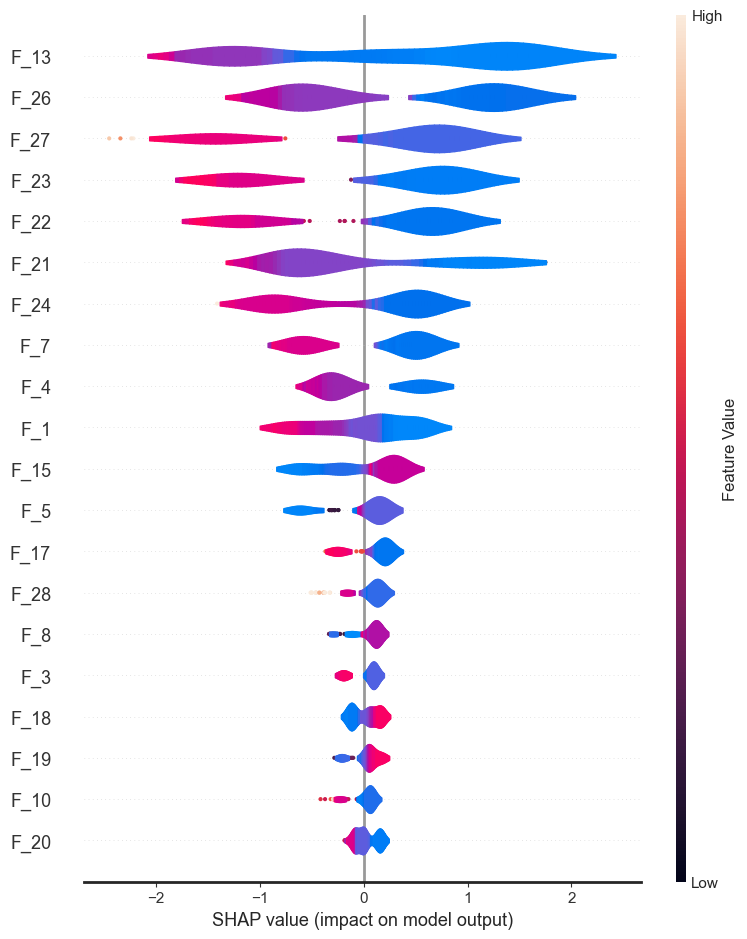

In [9]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

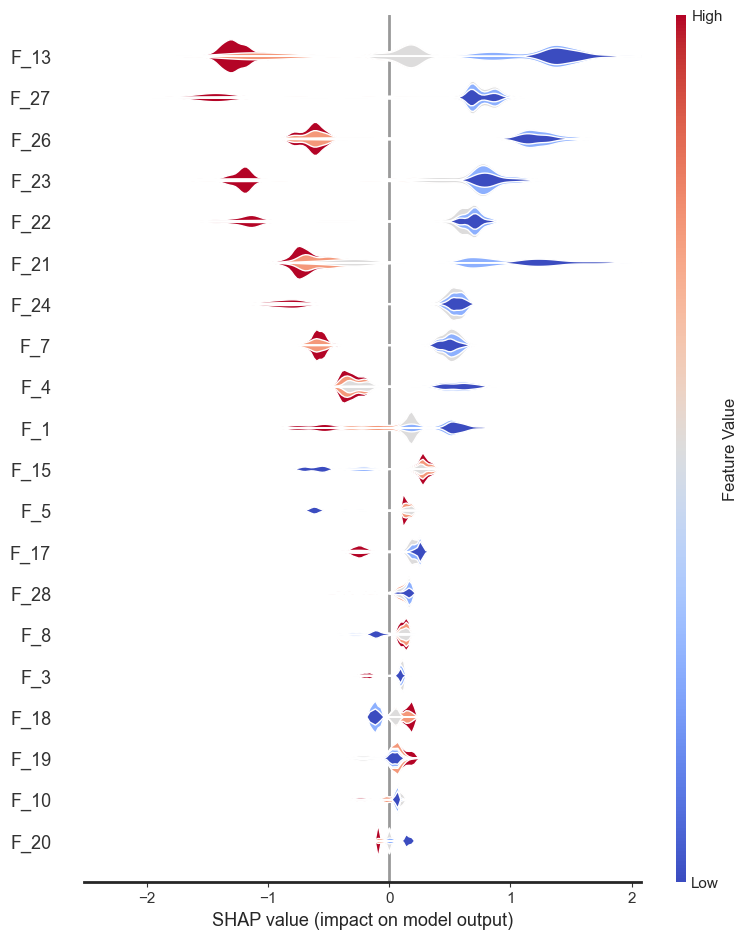

In [10]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

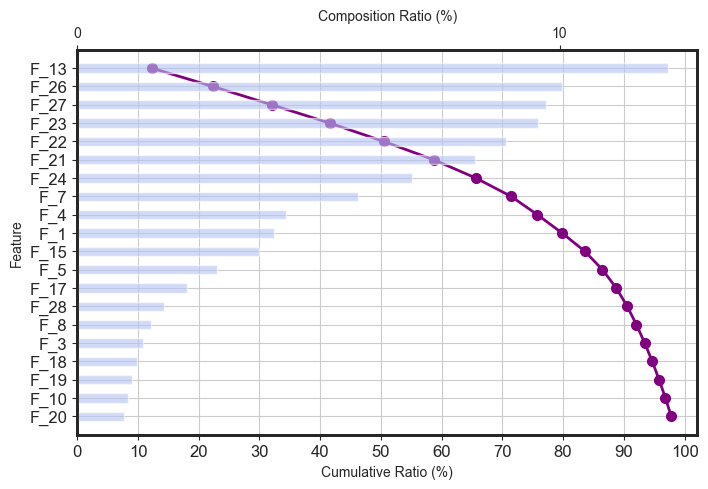

In [11]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [12]:
clf.shap_values_test_[:10]

array([[-4.47408482e-03, -1.51780576e-01, -2.02141963e-02,
        -1.85396850e-01, -4.01964068e-01,  1.21235818e-01,
        -6.35339171e-02, -6.07047737e-01,  7.13285133e-02,
         3.48655926e-03, -2.02936545e-01,  0.00000000e+00,
        -5.29705882e-02, -1.29023957e+00, -3.05350237e-02,
         2.78510630e-01,  6.12420663e-02, -1.89322114e-01,
         1.88916102e-01,  1.84534088e-01, -9.11967903e-02,
        -2.61333197e-01, -1.14804089e+00, -1.19664633e+00,
        -7.37019897e-01, -1.75916106e-02, -5.26720941e-01,
        -1.44604862e+00, -1.57236502e-01,  9.55877639e-03],
       [-6.65673055e-03,  1.68346092e-01,  7.08013074e-03,
         9.02095810e-02, -3.14889789e-01,  1.94482177e-01,
         7.90395439e-02,  5.72497725e-01,  1.55236363e-01,
         5.43389097e-03,  6.41452149e-02,  0.00000000e+00,
         1.37650017e-02,  1.54911113e+00, -1.25565324e-02,
        -2.77397752e-01,  1.23347407e-02,  2.43120119e-01,
         1.48090884e-01, -1.99932918e-01,  1.80877075e-

In [13]:
clf.shap_values_train_[:10]

array([[ 1.32322973e-02,  1.88023284e-01,  7.08013074e-03,
         8.14742967e-02, -3.24441135e-01,  1.86154678e-01,
         7.06284493e-02,  5.28463364e-01,  1.30848020e-01,
         5.43389097e-03,  3.43064144e-02,  0.00000000e+00,
         8.38498957e-03,  1.82729375e+00,  1.52465217e-02,
        -2.71063477e-01,  7.41871074e-03,  1.93774268e-01,
        -8.73778462e-02,  5.76712750e-02,  4.73742886e-03,
        -2.46869728e-01,  6.81340635e-01,  7.12934375e-01,
        -8.66347253e-01,  2.30794195e-02, -5.00262380e-01,
         7.59737045e-02, -4.38845634e-01,  4.21649627e-02],
       [ 5.32831717e-03,  1.06852047e-01, -5.96616976e-03,
        -1.57496795e-01, -4.01964068e-01,  1.12164617e-01,
        -6.35339171e-02, -6.07047737e-01,  8.13089386e-02,
         3.48655926e-03, -1.60764493e-02,  0.00000000e+00,
         1.08985929e-03, -1.18956172e+00, -3.05350237e-02,
         2.74460107e-01,  6.82314672e-03, -1.89322114e-01,
         1.88916102e-01,  1.84534088e-01, -9.11967903e-

In [14]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F_22,1805.329468
1,F_27,1472.025879
2,F_23,746.812927
3,F_7,429.703094
4,F_13,270.629639
5,F_26,240.595383
6,F_21,236.443283
7,F_24,117.907936
8,F_1,106.006729
9,F_4,47.317490


In [15]:
clf.model_

## You can use the `BinaryClassificationMetrics` class to evaluate your model

In [16]:
from slickml.metrics import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.977000,0.969000,0.996000,0.997000,0.964000,1.000000,0.997000,0.982000,0.993000,0.971000,0.964000,107,60,4,0


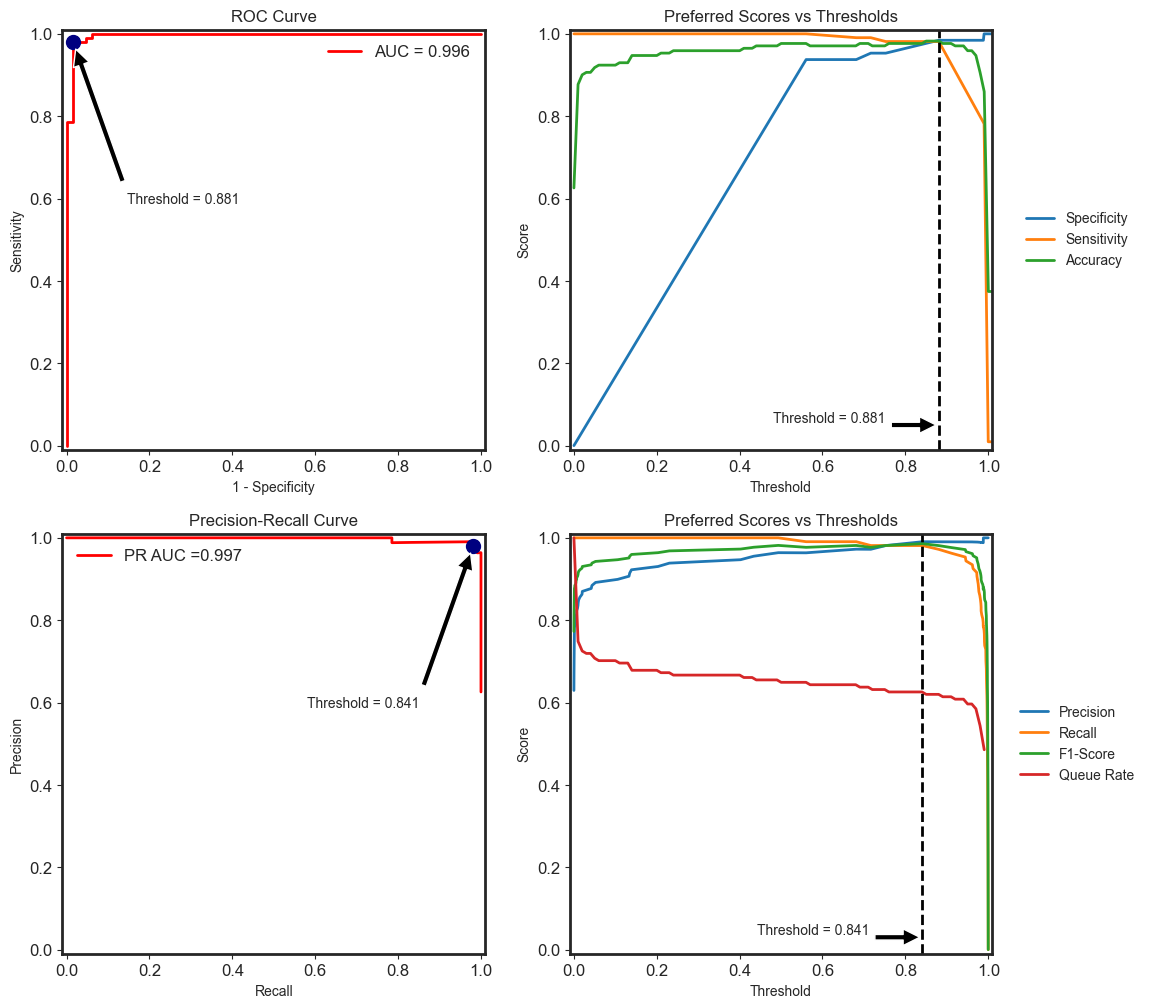

In [17]:
metrics.plot()

### Feel free to add your favorite `Example` via a `pull-request`.
### More details can be found in our [Contributing Document](https://github.com/slickml/slick-ml/blob/master/CONTRIBUTING.md).